# FIFA 2019 Exploratory Analysis

Greetings! I welcome whoever is checking this out to step into the world of International Football. Today, we will be going over an analysis of FIFA 19, diving into the individual skills of some of the top football players in the world, the money invested in these players, and the analytics involved to help one of the top Clubs in the world decide what their next big move should be. 

First, let's take a look at some of the data we have to offer:

In [176]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

cwd = os.getcwd()
print(cwd)

#Change working directory
os.chdir(r'''C:\Users\wscott\AppData\Local\Programs\Python''')
print(cwd)


C:\Users\wscott\AppData\Local\Programs\Python
C:\Users\wscott\AppData\Local\Programs\Python


In [193]:
#Opens up the CSV file in my working directory and sets the dataframe as a callable variable
df = pd.read_csv('Fifa19_Data.csv')

df

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
9,9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M


So that all looks a bit messy, but now we have a general idea of what kind of data we have. There are some descriptive traits like the player's name, age, and nationality as well as specific numeric traits like composure, slide tackling, and goal kicking ability. 

Let's get a better description of all the different columns this dataset has to offer.

In [178]:
display(df.columns)
display(df.dtypes)

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

Unnamed: 0                    int64
ID                            int64
Name                         object
Age                           int64
Photo                        object
Nationality                  object
Flag                         object
Overall                       int64
Potential                     int64
Club                         object
Club Logo                    object
Value                        object
Wage                         object
Special                       int64
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Body Type                    object
Real Face                    object
Position                     object
Jersey Number               float64
Joined                       object
Loaned From                  object
Contract Valid Until         object
Height                       object
Weight                      

Now that we have an idea of the type of data we're working with, let's do some exploring!

It would be interesting to see the distribution of ages among these players.

The Distribution of Players by Age has mean 25.122205745043114 and standard deviation 4.66994271341431 

Additionally, player age ranges from 16 to 45.


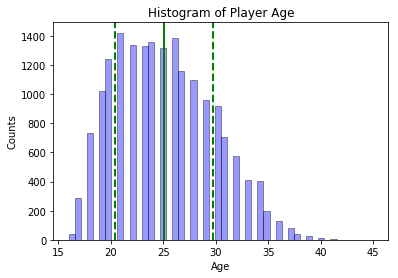

In [251]:
#Pull the age column from the dataset
Age = df['Age']

sns.distplot(Age, hist=True, kde=False, 
             color = 'blue',
             hist_kws={'edgecolor':'black'})

#Add a vertical line at the mean.
plt.axvline(Age.mean(), color='g', linestyle='solid', linewidth=2)

#Add a vertical line at one standard deviation above the mean.
plt.axvline(Age.mean() + Age.std(), color='g', 
            linestyle='dashed', linewidth=2)

# Add a vertical line at one standard deviation below the mean.
plt.axvline(Age.mean()- Age.std(), color='g', 
            linestyle='dashed', linewidth=2) 

plt.title('Histogram of Player Age')
plt.xlabel('Age')
plt.ylabel('Counts')

print('The Distribution of Players by Age has mean {} and standard deviation {} \n'.format( Age.mean(), Age.std()))

print('Additionally, player age ranges from {} to {}.'.format( Age.min(), Age.max()))

Looks like the data is relatively centralized at 25 with most players between 20 and 30. 

It's worth noting the stark similarity to the Poisson Distribution. This is not terribly surprising, as the Poisson represents a decaying function. Player's coninually age over time and their skill begins to deteriorate. As their skill starts to dwain, they will lose value, and will eventually retire.

With the hypothesis that skill begins to deteriorate over time, let's see how the Overall Skill attribute changes as age increases.

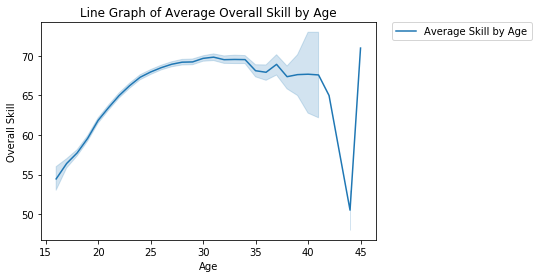

In [248]:
sns.lineplot(x="Age", y="Overall", data=df, label='Average Skill by Age')

plt.title('Line Graph of Average Overall Skill by Age')
plt.xlabel('Age')
plt.ylabel('Overall Skill')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

The dark blue line in the middle represents the mean Overall Skill for each age. The lighter blue border represents the 95% Confidence Interval. In other words, there's a 95% probability that if this data is a sample of a larger population, the true mean will be within the given interval. As we anticipated, player skill increases significantly from year to year at a young age, yearly skill increase becomes less steep, then skill begins to viusally decrease around 35.

__Note__: 
*In our case, the Confidence Interval is a good indicator of how many players there are for each age group, rather than indicating where a population mean may lie. The more players there are (age 20-30), the tighter the Confidence Interval. Whereas from 30 onward, the interval gets much larger because there are less players at that age playing at the elite level.* 

The next curiosity that comes to mind is what is the age range that sees the greatest increase in Overall Skill. The best way to do this would be to group the data frame by Age, finding each age's mean Overall Skill. This will tell me what age group has the highest probability of the most increase in skill over the next few years. 

__Further Explanation:__

*I am looking for an age range with the largest positive increase in skill over the course of 3 years. From a financial standpoint, I am looking for an investment with the greatest liklihood to grow in value over time. If the player gets better over time, the worse case scenario is that he doesn't fit well with the team and the manager can sell him for a higher price.*

In [245]:
#Displays the average Overall Skill for each age group
Age_Overall = df[['Overall', 'Age']].groupby('Age').mean()

Age_Overall

,Overall
Age,
16,54.452381
17,56.404844
18,57.741803
19,59.583008
20,61.858871
21,63.480675
22,64.994030
23,66.244745
24,67.306333


Next, let's iterate over a 3 year age range and find the greatest (positive) difference in Overall Skill.

In [197]:
#Initializing the range for the first iteration of the for loop
top_range = 0

#For loop iterating over the age range, being careful of Out of Bounds errors
for age in range(0, Age_Overall.size - 3):
    
    #This gets the value (Overall Skill) of the current indexed age and the value of the age 3 years older
    Older_Overall_Skill = Age_Overall.iloc[age+3].get_value('Overall')
    Younger_Overall_Skill = Age_Overall.iloc[age].get_value('Overall')
    
    #Using a boolean to check if the current Overall Skill range is greater than the current top_range
    if top_range < Older_Overall_Skill - Younger_Overall_Skill:

        #If true, set the current range, to the top_range
        top_range = Older_Overall_Skill - Younger_Overall_Skill
        
        #The indexed age of the greatest positive difference in Overall Skill
        Upper_Age = Age_Overall.index[age+3]
        Lower_Age = Age_Overall.index[age]
        
        #Prints the different age top age ranges as they change
        print('Age Range: ' + str(Lower_Age) + '-' + str(Upper_Age))
        print('Overall Difference: ' + str(top_range))
print('The Age Range with the greatest Overall Skill increase is between {} and {} with an average increase of {}.'.format(Lower_Age,  Upper_Age, top_range))

Age Range: 16-19
Overall Difference: 5.130626860119051
Age Range: 17-20
Overall Difference: 5.454026677084499
Age Range: 18-21
Overall Difference: 5.73887135237262
The Age Range with the greatest Overall Skill increase is between 18 and 21 with an average increase of 5.73887135237262.


c:\users\wscott\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
c:\users\wscott\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.


Awesome! So what this tells me is that if I were to invest in a player with the hopes my club could increase his skill even further, I would look for a prospect between 18 and 21 years old.

The next thing I would like to check out is how much players are being paid on average for each position.

Unfortunately, FIFA is extremely detailed with exactly what position players prefer. So instead of just having 'D' for Defense, a player could be set as a Central Back ('CB') or a Left Wing Back (LWB). Let's clean that up:

In [252]:
#Copying the position column into a new General_Position column
df['General_Position'] = df.Position

#Creating a mask for each new position based on current naming convention
Winger_mask = (df.Position.str.contains('W', na=False))
Defender_mask = (df.Position.str.contains('B', na=False))
Wingback_Defender_mask = (df.Position.str.contains('WB', na=False))
Midfield_mask = (df.Position.str.contains('M', na=False))
Forward_mask = (df.Position.str.contains('F', na=False))
Striker_mask = (df.Position.str.contains('S', na=False))

#Setting the appropriate mask to the corresponding General_Position
df.loc[Winger_mask, 'General_Position'] = 'M'
df.loc[Defender_mask, 'General_Position'] = 'D'
df.loc[Wingback_Defender_mask, 'General_Position'] = 'D'
df.loc[Midfield_mask, 'General_Position'] = 'M'
df.loc[Forward_mask, 'General_Position'] = 'F'
df.loc[Striker_mask, 'General_Position'] = 'F'

#Some players do not have a preferred position, so let's place them as a midfielder
df.loc[df.Position.isnull(), 'General_Position'] = 'M'

In [253]:
#Looking at the newly created General_Position feature
df[['Name', 'Position', 'General_Position']]

,Name,Position,General_Position
0,L. Messi,RF,F
1,Cristiano Ronaldo,ST,F
2,Neymar Jr,LW,M
3,De Gea,GK,GK
4,K. De Bruyne,RCM,M
5,E. Hazard,LF,F
6,L. Modrić,RCM,M
7,L. Suárez,RS,F
8,Sergio Ramos,RCB,D
9,J. Oblak,GK,GK


Looks like it worked, but let's take a look at Messi to be certain. As a Right Forward ('RF') he is now simply considered a Forward ('F'). 

One more step we must take is converting 'Wages', a measure of weekly pay, to a useable integer as shown:
€405K -> 405

In [267]:
#Looks for the digits within the string and converts to an integer
df['Weekly_Pay'] = df.Wage.replace('[\D+]', '', regex=True)
df['Weekly_Pay'] = df.Weekly_Pay.astype(int)
df[['Name', 'General_Position', 'Weekly_Pay']]

,Name,General_Position,Weekly_Pay
0,L. Messi,F,565
1,Cristiano Ronaldo,F,405
2,Neymar Jr,M,290
3,De Gea,GK,260
4,K. De Bruyne,M,355
5,E. Hazard,F,340
6,L. Modrić,M,420
7,L. Suárez,F,455
8,Sergio Ramos,D,380
9,J. Oblak,GK,94


Let's see the how Weekly Pay varies within each Position.

Text(0, 0.5, 'Weekly Pay in €')

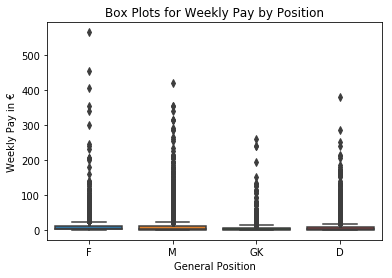

In [254]:
sns.boxplot(x='General_Position', y='Weekly_Pay', data=df)

plt.title('Box Plots for Weekly Pay by Position'.format(Lower_Skill_Range, Upper_Skill_Range))
plt.xlabel('General Position')
plt.ylabel('Weekly Pay in €')

Yikes! Looks like the upper tier players are being paid so much we can't even see the other quartiles. I think it would be best to look at an Overall Skill above 80, but feel free to interact with the range on your own!

In [275]:
#Let's turn this into a function we can call upon later
def skill_boxplot():

    #Allows users to input Skill Ranges to manipulate the distribution on the graph
    Lower_Skill_Range = input('Enter Lower Skill Range: ')
    Upper_Skill_Range = input('Enter Upper Skill Range: ')

    #Creates a filter based on the user's inputs
    Skill_mask = ((df.Overall > int(Lower_Skill_Range)) & (df.Overall < int(Upper_Skill_Range)))
    Skill_Weekly_Pay = df[Skill_mask]

    sns.boxplot(x='General_Position', y='Weekly_Pay', data=Skill_Weekly_Pay)

    plt.title('Box Plots for Weekly Pay by Position \n Overall Skill: {} - {}'.format(Lower_Skill_Range, Upper_Skill_Range))
    plt.xlabel('General Position')
    plt.ylabel('Weekly Pay in €')

Enter Lower Skill Range: 80
Enter Upper Skill Range: 100


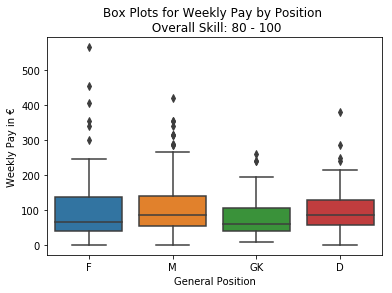

In [278]:
skill_boxplot()

From this, I can conclude that Midfielders with an Overall Skill above 80 have the highest 75% Quartile for Weekly Pay and some of the highest paid players in the world would be considered Forwards (Messi and Ronaldo).

Because players in the midfield are the one's that see the most action in the game, it would make sense to pay these players a hefty penny to stick around. On the other hand, having the best goal scorers (Strikers) in the game is priceless, and it seems Barcelona and (now) Juventus will pay whatever it takes to keep them!

The last thing I would like to do is see how some players have progressed since FIFA 2018. The best way to do that is to join the 2018 and 2019 datasets together!

First we're going to read the file, join on a particular field (ID), and add in a few columns of our choice.

In [201]:
df2 = pd.read_csv('Fifa18_Data.csv')

Joined_df = pd.merge(df,
                 df2[['ID', 'name', 'club', 'league', 'overall']],
                 on=['ID'])

Joined_df

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,GKKicking,GKPositioning,GKReflexes,Release Clause,General_Position,Weekly_Pay,name,club,league,overall
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,15.0,14.0,8.0,€226.5M,F,565,L. Messi,FC Barcelona,Spanish Primera División,93
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,15.0,14.0,11.0,€127.1M,F,405,Cristiano Ronaldo,Real Madrid CF,Spanish Primera División,94
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,15.0,15.0,11.0,€228.1M,M,290,Neymar,Paris Saint-Germain,French Ligue 1,92
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,87.0,88.0,94.0,€138.6M,GK,260,De Gea,Manchester United,English Premier League,90
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,5.0,10.0,13.0,€196.4M,M,355,K. De Bruyne,Manchester City,English Premier League,89
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,6.0,8.0,8.0,€172.1M,F,340,E. Hazard,Chelsea,English Premier League,90
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,7.0,14.0,9.0,€137.4M,M,420,L. Modrić,Real Madrid CF,Spanish Primera División,89
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,31.0,33.0,37.0,€164M,F,455,L. Suárez,FC Barcelona,Spanish Primera División,92
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,9.0,7.0,11.0,€104.6M,D,380,Sergio Ramos,Real Madrid CF,Spanish Primera División,90
9,9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,...,78.0,88.0,89.0,€144.5M,GK,94,J. Oblak,Atlético Madrid,Spanish Primera División,88


Let's change a few column names and add a feature that tells us the player's Overall Skill change year over year.

In [205]:
Joined_df = Joined_df.rename(columns={"overall":"Previous_Overall", 
                                      "club":"Previous_Club", 'league':'Previous_League'})

Joined_df['Overall_Change'] = Joined_df.Overall - Joined_df.Previous_Overall
Joined_df

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,GKPositioning,GKReflexes,Release Clause,General_Position,Weekly_Pay,name,Previous_Club,Previous_League,Previous_Overall,Overall_Change
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,14.0,8.0,€226.5M,F,565,L. Messi,FC Barcelona,Spanish Primera División,93,1
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,14.0,11.0,€127.1M,F,405,Cristiano Ronaldo,Real Madrid CF,Spanish Primera División,94,0
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,15.0,11.0,€228.1M,M,290,Neymar,Paris Saint-Germain,French Ligue 1,92,0
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,88.0,94.0,€138.6M,GK,260,De Gea,Manchester United,English Premier League,90,1
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,10.0,13.0,€196.4M,M,355,K. De Bruyne,Manchester City,English Premier League,89,2
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,8.0,8.0,€172.1M,F,340,E. Hazard,Chelsea,English Premier League,90,1
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,14.0,9.0,€137.4M,M,420,L. Modrić,Real Madrid CF,Spanish Primera División,89,2
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,33.0,37.0,€164M,F,455,L. Suárez,FC Barcelona,Spanish Primera División,92,-1
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,7.0,11.0,€104.6M,D,380,Sergio Ramos,Real Madrid CF,Spanish Primera División,90,1
9,9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,...,88.0,89.0,€144.5M,GK,94,J. Oblak,Atlético Madrid,Spanish Primera División,88,2


Looks like Messi has improved from 93 to 94 (I can see why he's being paid the big bucks!). Now what I believe really cultivates player growth is the Club they play for.

Let's check out which teams in La Liga had the greatest average improvement among their players since 2018.

__Note__: *Because only FIFA 18 has a League column, we can only pull players that stayed on the same team year over year. Otherwise, when you pull the Club, it will output the previous league (i.e. Juventus will populate La Liga instead of Italian Serie A because Cristiano played on a team in La Liga last year).*

In [154]:
#Noticed Real Madrid was renamed since last year's dataset, so I changed it accordingly
Real_Madrid_mask = Joined_df.Previous_Club=='Real Madrid CF'
Joined_df.loc[Real_Madrid_mask, 'Previous_Club'] = 'Real Madrid'

#Because some player's may have switched clubs, we can only take rows (players) 
Same_Club_mask = Joined_df.Club==Joined_df.Previous_Club
Liga_mask = Joined_df.Previous_League=='Spanish Primera División'

La_Liga_df = Joined_df[Same_Club_mask & Liga_mask]

#Club_Filtered
La_Liga_Overall_Change = Club_Filtered[['Overall_Change', 'Club']].groupby('Club').mean()

Club_Filtered_Overall_Change.sort_values('Overall_Change', ascending=False)

,Overall_Change
Club,
Getafe CF,3.818182
Valencia CF,2.722222
Deportivo Alavés,2.466667
Levante UD,1.789474
SD Eibar,1.533333
Atlético Madrid,1.500000
FC Barcelona,1.142857
Real Madrid,0.904762
Villarreal CF,0.750000


Now that we finally have all the pieces, let's put our analysis to good use and recommend a player Real Madrid should trade. 

With Ronoldo off to Juventus, let's checkout his replacement striker, Karim Benzema.

In [164]:
Benzema_mask = (Joined_df.Name.str.contains('Benzema', na=False))

Joined_df.loc[Benzema_mask, ['Name', 'Age', 'Overall', 'General_Position', 'Club', 'Wage', 'Release Clause', 'Contract Valid Until']]

,Name,Age,Overall,General_Position,Club,Wage,Release Clause,Contract Valid Until
105,K. Benzema,30,85,F,Real Madrid,€240K,€75.9M,2021


So an 85 Overall is pretty good, but let's see if Real Madrid is overpaying for a player of that Skill and Position, especially since there is little probability for growth at age 30.

Enter Lower Skill Range: 82
Enter Upper Skill Range: 88


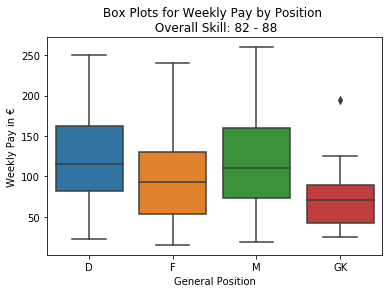

In [222]:
#I suggest an Overall Skill between 82-88
skill_boxplot()

As you can see, for someone of Benzema's skill, he's making more money than well over 75% of other Forwards with his skill level. So it looks like its been a great run with Benzema, but its time to see a newer (younger) face at the front of the franchise!

All that's left to do is filter on the following masks:

- Age between 18 - 21 (greatest prospect to increase in skill overtime)
- Skill above 80 (if fostered appropriately, his growth will exceed that of Benzema at 85)
- Overall Skill Change year over year greater than 0 (looking for a player who is continually growing)
- Weekly Pay below €240K (the player would need to prove over time that he's worth more than Benzema)
- From a Club that does not compete in La Liga (teams rarely trade within the same league)

This should return a player(s) that fit our criteria. 

In [234]:
def player_search():
    
    Lower_Age_Range = input('Enter Lower Age Range: ')
    Upper_Age_Range = input('Enter Upper Age Range: ')

    Age_mask = ((Joined_df.Age >= int(Lower_Age_Range)) & (Joined_df.Age <= int(Upper_Age_Range)))

    
    Lower_Skill_Range = input('Enter Lower Skill Range: ')
    Upper_Skill_Range = input('Enter Upper Skill Range: ')

    Skill_mask = ((Joined_df.Overall >= int(Lower_Skill_Range)) & (Joined_df.Overall <= int(Upper_Skill_Range)))

    
    Lower_Weekly_Pay_Range = input('Enter Lower Pay Range: ')
    Upper_Weekly_Pay_Range = input('Enter Upper Pay Range: ')

    Pay_mask = ((Joined_df.Weekly_Pay >= int(Lower_Weekly_Pay_Range)) & (Joined_df.Weekly_Pay <= int(Upper_Weekly_Pay_Range)))

    
    Position = input('Enter GK, D, M, or F for Position: ')
    
    Position_mask = Joined_df.General_Position==Position
    
    
    Skill_Change_mask = (Joined_df.Overall_Change > 0)
    
    League_mask = Joined_df.Previous_League!='Spanish Primera División'


    Player_Search = Joined_df[Age_mask & Skill_mask & Skill_Change_mask & Pay_mask & League_mask & Position_mask]

    display(Player_Search)
    display(Player_Search[['Name', 'Overall', 'General_Position', 'Club', 'Wage', 'Release Clause', 'Contract Valid Until']])

In [235]:
player_search()

Enter Lower Age Range: 18
Enter Upper Age Range: 21
Enter Lower Skill Range: 80
Enter Upper Skill Range: 100
Enter Lower Pay Range: 0
Enter Upper Pay Range: 240
Enter GK, D, M, or F for Position: F


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,GKPositioning,GKReflexes,Release Clause,General_Position,Weekly_Pay,name,Previous_Club,Previous_League,Previous_Overall,Overall_Change
156,156,230666,Gabriel Jesus,21,https://cdn.sofifa.org/players/4/19/230666.png,Brazil,https://cdn.sofifa.org/flags/54.png,83,92,Manchester City,...,6.0,15.0,€84.1M,F,130,Gabriel Jesus,Manchester City,English Premier League,81,2


,Name,Overall,General_Position,Club,Wage,Release Clause,Contract Valid Until
156,Gabriel Jesus,83,F,Manchester City,€130K,€84.1M,2023


So there you have it. Among the 18,207 players in the FIFA 2019 dataset, it seems there should be only one player on Real Madrid's mind to turn the franchise around: Gabriel Jesus.

I'll be sure to send this to Zinedine Zidane right away!